# 제 3장 EDA와 시각화
#### [깃허브 주소](https://github.com/ADPclass/ADP_book_ver01/blob/main/%EC%A0%9C3%EC%9E%A5_EDA%EC%99%80%EC%8B%9C%EA%B0%81%ED%99%94/Ch3.ipynb)
#### 가상환경에서 패키지 설치 방법
1. Anaconda Prompt (anaconda3) 접속
2. 가상환경 활성화 
    - activate <가상환경 이름(adp_code)>
3. 가상환경이 활성화된 상태에서 패키지 설치
    - pip install <패키지 이름>==<버전>

In [1]:
# !pip install pandas==1.1.2
import pandas as pd
print(pd.__version__)
import sklearn
print(sklearn.__version__)
import numpy as np
print(np.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)

1.1.2
0.23.2
1.21.6


### 막대그래프
- plt.bar(x, **width**, ...)
- plt.barh(x, **height**, ...)

In [12]:
# 데이터 가져오기
from sklearn.datasets import load_wine
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0: 'class_0', 1:'class_1', 2:'class_2'})

# 도수분포표
wine_type = wine['Class'].value_counts()
wine_type

class_1    71
class_0    59
class_2    48
Name: Class, dtype: int64

In [13]:
wine.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0


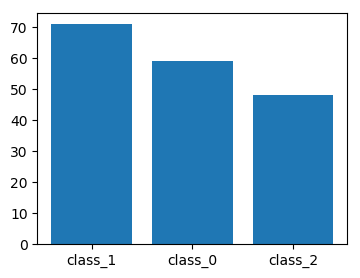

In [34]:
# 막대그래프 그리기
plt.figure(figsize=(4,3))
plt.bar(wine_type.index, wine_type.values, width=0.8, bottom=None, align='center')
plt.show()

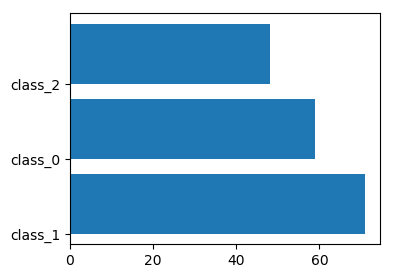

In [35]:
# 막대그래프 그리기(수평)
plt.figure(figsize=(4,3))
plt.barh(wine_type.index, wine_type.values, height=0.8, left=None, align='edge')
plt.show()

### 히스토그램
- plt.hist(bins, range, density)
    - bins = 구간 개수
    - range = bin의 상한값과 하한값(x.min(), x.max())
    - density = True 이면 확률밀도함수를 그리고 반환

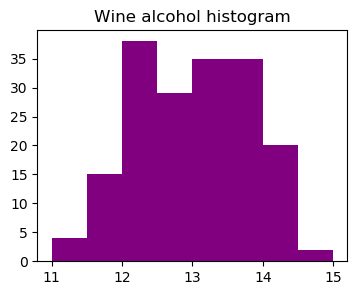

In [36]:
plt.figure(figsize=(4,3))
plt.title('Wine alcohol histogram')
plt.hist('alcohol', bins=8, range=(11,15), color='purple', data=wine)
plt.show()

### 상자그림

In [48]:
# 데이터 가져오기
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


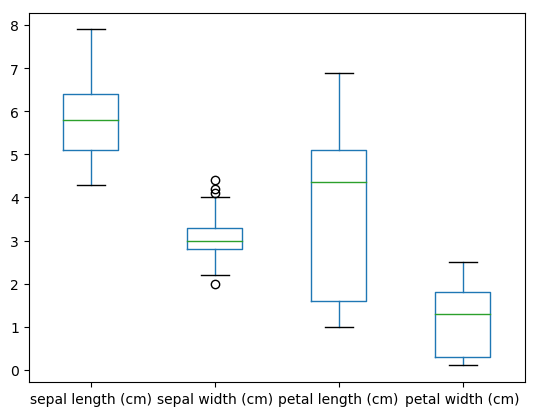

In [55]:
# boxplot 그리기
iris.drop(columns='Class').plot(kind='box') # 문자열 변수는 상자그림으로 표현 불가능
plt.show()

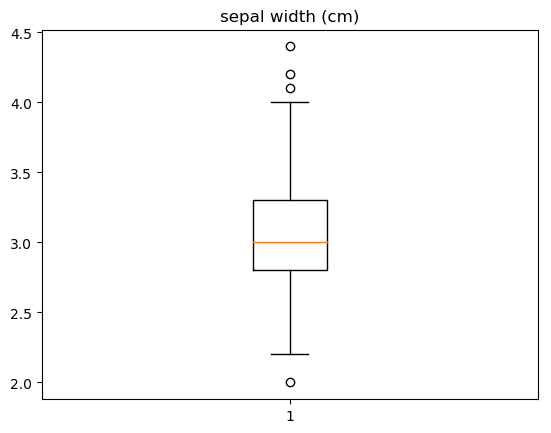

In [56]:
plt.boxplot(iris['sepal width (cm)'], whis=1.5) # whis: 수염의 길이를 구하기 위해 IQR에 곱하는 수 지정(default=1.5)
plt.title('sepal width (cm)')
plt.show()

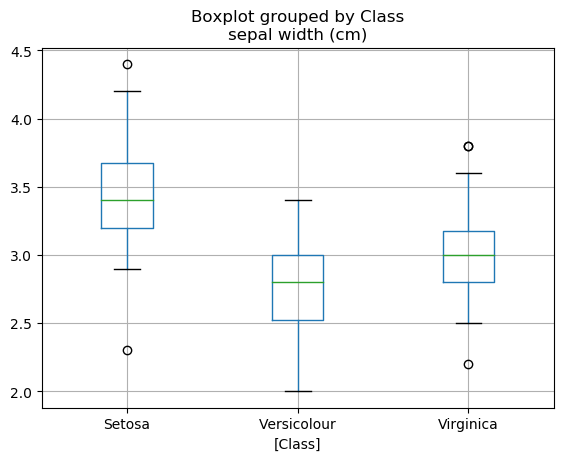

In [59]:
iris[['sepal width (cm)', 'Class']].boxplot(by='Class') # Class에 따른 sepal width (cm)값의 차이
plt.show()

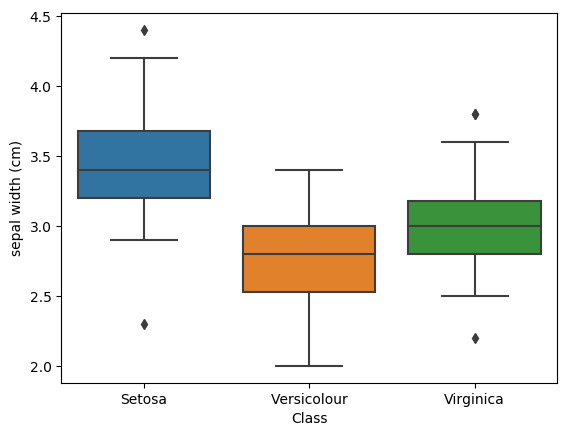

In [64]:
sns.boxplot(x='Class', y = 'sepal width (cm)', data=iris)
plt.show()

### 산점도

In [65]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


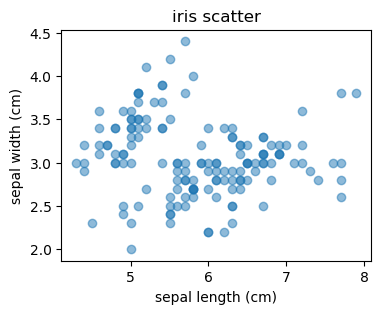

In [71]:
# 산점도 그리기
plt.figure(figsize=(4,3))
plt.title('iris scatter')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(x='sepal length (cm)', y='sepal width (cm)', alpha=.5, data=iris)
plt.show()

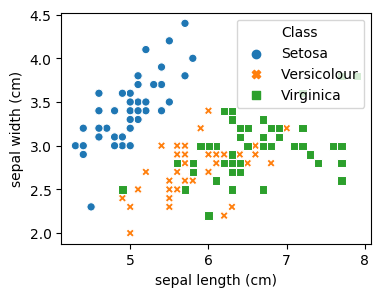

In [76]:
# 산점도 그리기
plt.figure(figsize=(4,3))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='Class', style='Class', data=iris)
plt.show()